In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [ ]:
iris=load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_data['lebel']=iris.target

In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lebel
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
labal=np.unique(iris.target)
labal_n=np.unique(iris.target_names)
label_dist=dict(zip(labal,labal_n))
iris_data['lebel']=iris_data['lebel'].replace(label_dist)

In [ ]:
x=iris_data.drop(columns='lebel')
y=iris_data['lebel']
featuers=x.columns
target=y.unique()

In [ ]:
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [ ]:
dtc=DecisionTreeClassifier(max_depth=5,random_state=3)


In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=3)

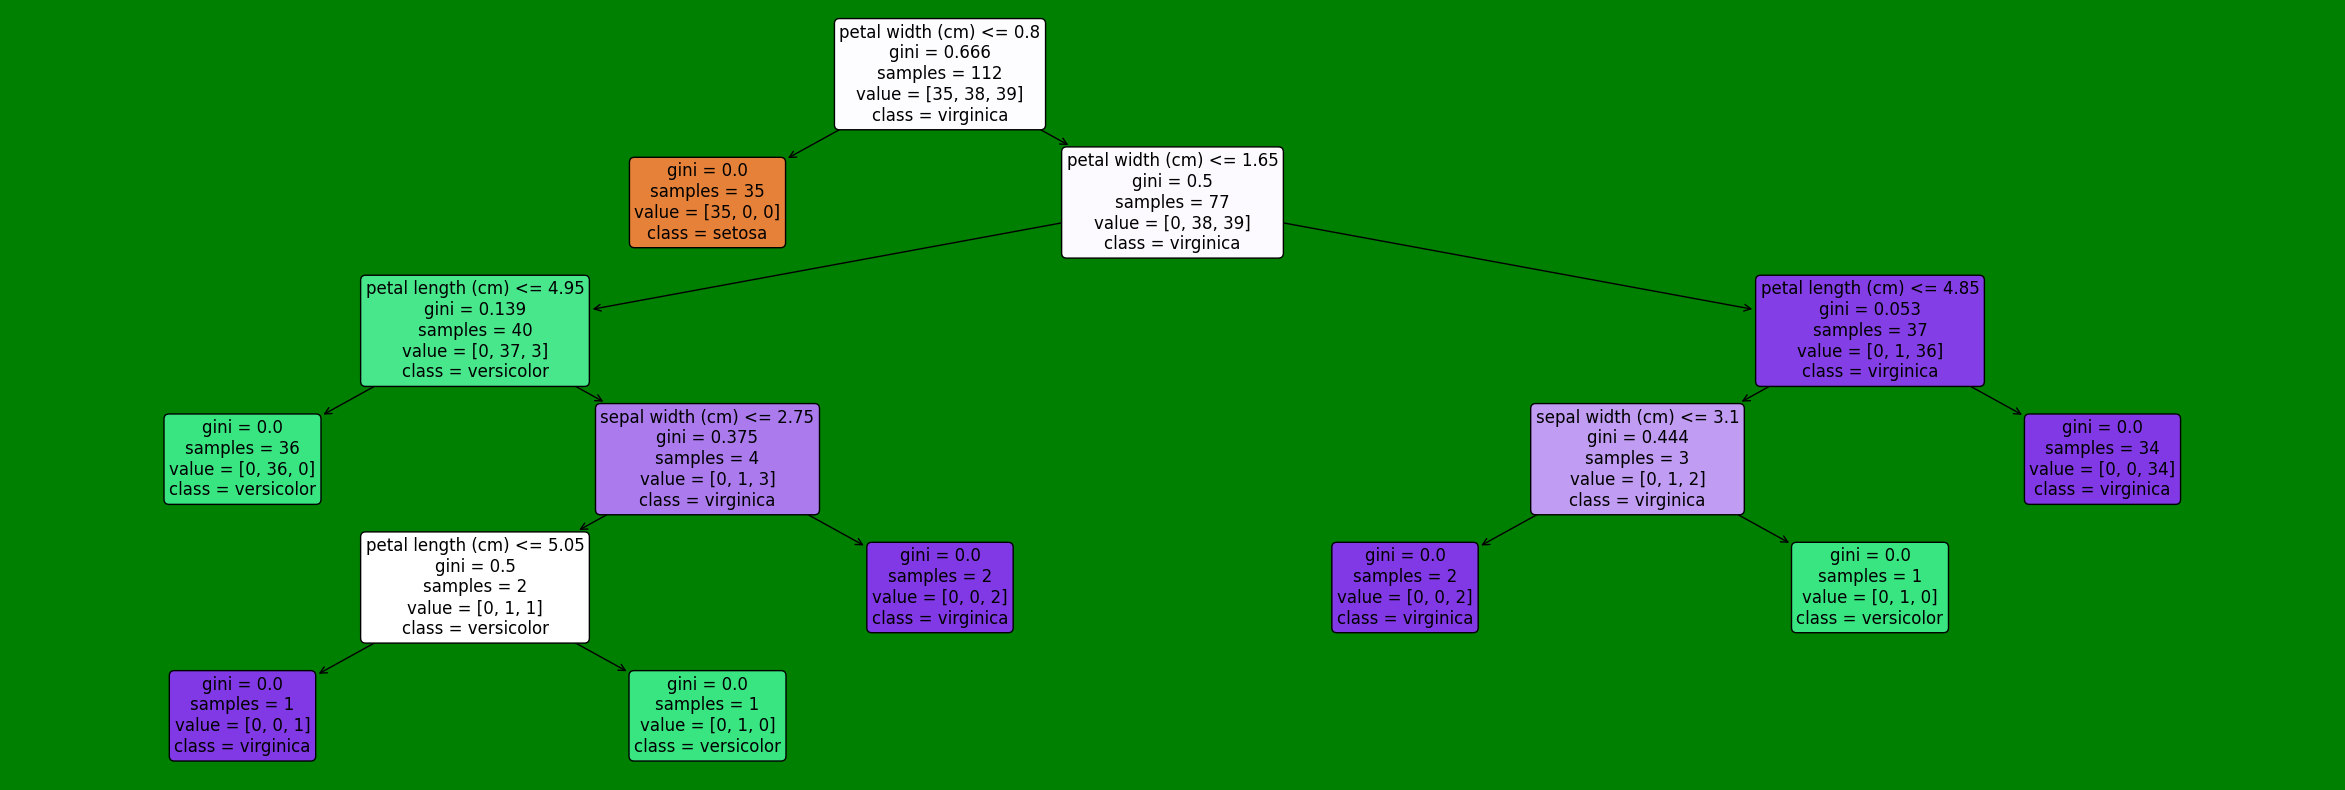

In [ ]:
plt.figure(figsize=(30,10),facecolor="g")
tree.plot_tree(dtc,feature_names=featuers,class_names=target,rounded=True,filled=True,fontsize=12)
plt.show()

In [ ]:
y_pred=dtc.predict(x_train)

In [ ]:
accuracy=accuracy_score(y_train,y_pred)
accuracy

1.0

In [ ]:
x_test_pred=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,x_test_pred)

In [ ]:
test_accuracy

0.9473684210526315

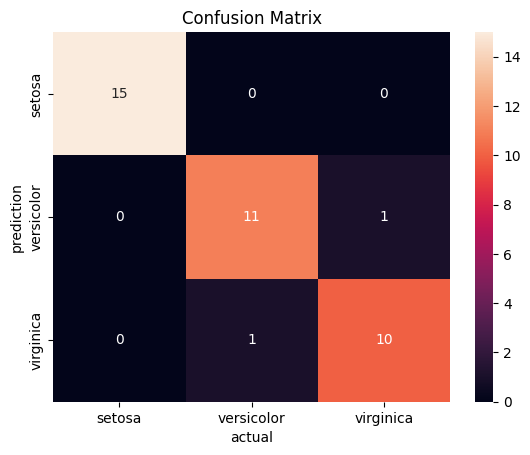

In [ ]:
cm=confusion_matrix(y_test,x_test_pred)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['setosa','versicolor','virginica'],yticklabels=['setosa','versicolor','virginica'])
plt.ylabel("prediction")
plt.xlabel("actual")
plt.title("Confusion Matrix")
plt.show()

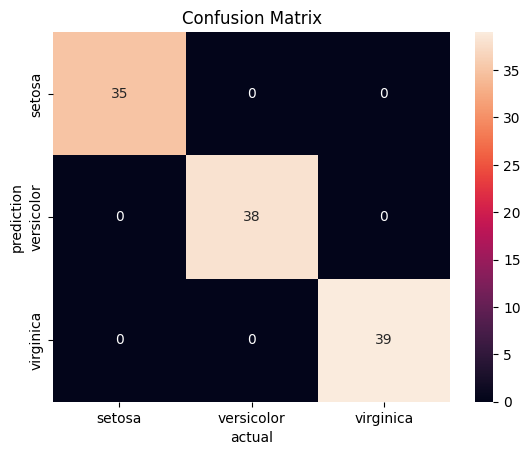

In [ ]:
cm=confusion_matrix(y_train,y_pred)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['setosa','versicolor','virginica'],yticklabels=['setosa','versicolor','virginica'])
plt.ylabel("prediction")
plt.xlabel("actual")
plt.title("Confusion Matrix")
plt.show()

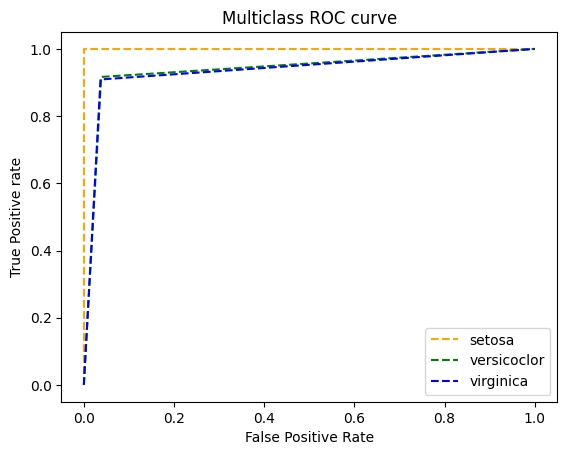

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier

# Binarize the test labels
y_test_bin = label_binarize(y_test,classes=['setosa','versicolor','virginica'])

# Create a OneVsRestClassifier with your chosen classifier
ovr_clf = OneVsRestClassifier(dtc)

# Fit the classifier to the training data
ovr_clf.fit(x_train, y_train)

# Predict probabilities for each class on the test data
y_score = ovr_clf.predict_proba(x_test)

# Calculate ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(target)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='setosa')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='versicoclor')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='virginica')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);